## Install necessary packages

In [1]:
!pip install pillow pytesseract pyautogui pynput
!brew install tesseract

To reinstall 5.3.3, run:
  brew reinstall tesseract


In [57]:
from PIL import Image, ImageGrab
import pytesseract
import pyautogui
import requests
from pynput.mouse import Listener


## Screen capture part
User can click on 2 positions on the screen and ImageGrab capture the rectangle defined by those coordinates

In [3]:
class ClickListener:
    def __init__(self):
        self.coordinates = None
        self.keep_listening = True

    def on_click(self, x, y, button, pressed):
        if pressed:
            self.coordinates = int(x), int(y)
            self.keep_listening = False
            return False  # Stop the listener

    def get_coordinates(self):
        with Listener(on_click=self.on_click) as listener:
            listener.join()  # This will block until on_click returns False
        return self.coordinates


In [4]:
def capture_screen():
    # Create an instance of ClickListener
    click_listener = ClickListener()
    
    # Get the mouse coordinates after the first click
    x1, y1 = click_listener.get_coordinates()
    x2, y2 = click_listener.get_coordinates()
    
    # Print the coordinates
    # print("First click coordinates:", x1, y1)
    print(f'Rectangle: x1: {x1} y1: {y1} x2: {x2} y2: {y2}')
    image = ImageGrab.grab(bbox=(x1, y1, x2, y2))
    return image

This process is not trusted! Input event monitoring will not be possible until it is added to accessibility clients.
This process is not trusted! Input event monitoring will not be possible until it is added to accessibility clients.


Rectangle: x1: 132 y1: 570 x2: 549 y2: 704


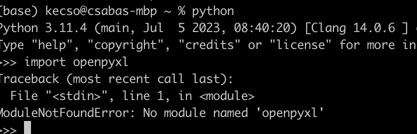

In [11]:

image = capture_screen()
display(image)

## Image to Text
Use Tesseract to recognize text on the image and convert it to a default prompt.
This prompt can be sent to the defined LLM to seek help. LLM can run local or can be a paid service like OpenAi or it can have an escalation from small local model -> organization hosted medium model -> very large LLM.

In [59]:
text = pytesseract.image_to_string(image)
# And with this text you can call the LLM
PROMPT_DEFAULT = "Help me with this: \n"
prompt = PROMPT_DEFAULT + text
print(prompt)

Help me with this: 
base) kecso@csabas-mbp ~ % python
vython 3.11.4 (main, Jul 5 2023, 08:40:20) [Clang 14.0.6 J
ype "help", "copyright", “credits” or “License” for more in
> import openpyxl
raceback (most recent call last):
File "<stdine", line 1, in <module>

foduleNotFoundError: No module named ‘openpyxl"
a |




## Integrate with LM Studio (https://lmstudio.ai/)
- Start LM studio with a model of your choice locally.
- Start the Local Inference Server

In [63]:
def send_request(user_input):
        url = f"http://localhost:1234/v1/chat/completions"
        headers = {"Content-Type": "application/json"}
        data = {
            "messages": [
                {"role": "user", "content": f"### Instruction: {user_input}\n###Response: "}
            ],
            "stop": ["### Instruction:"],
            "temperature": 0.7,
            "max_tokens": -1,
            "stream": False
        }
        response = requests.post(url, headers=headers, json=data)
        response.raise_for_status()
        return response.json()['choices'][0]['message']['content']


In [64]:
response = send_request(prompt)
print(response)


It seems that you are missing the openpyxl module. You can try to install it using pip or by downloading the source code and installing it manually. Here's how you can do it using pip:

1. First, make sure you have pip installed. If not, you can download it from https://pypa.ch/project/pip/.
2. Open a terminal or command prompt window.
3. Type the following command to install openpyxl:
```
pip install openpyxl
```
4. After the installation is complete, try running your Python script again.


In [65]:
def help_me():
    image = capture_screen()
    text = pytesseract.image_to_string(image)
    PROMPT_DEFAULT = "Help me with this: \n"
    prompt = PROMPT_DEFAULT + text
    return send_request(prompt)

In [ ]:
help_me()

This process is not trusted! Input event monitoring will not be possible until it is added to accessibility clients.


## This is just a dummy sandbox to tovide some sort of GUI

In [ ]:
import tkinter as tk

In [52]:
def print_to_new_window(text):
    new_window = tk.Toplevel(root)
    new_window.title("Prompt")

    text_label = tk.Label(new_window, text=text)
    text_label.pack()

# Create the main window
root = tk.Tk()
root.title("AI interact")


''

In [53]:
print_to_new_window(prompt)

In [54]:
root.mainloop()